<a href="https://colab.research.google.com/github/Jeet2561/13sep_Jeet/blob/main/Credit_Risk_Assessment_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [110]:
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [112]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [113]:
df.duplicated().sum()

np.int64(165)

In [114]:
df.drop_duplicates(inplace=True)

In [115]:
df.shape

(32416, 12)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [117]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,887
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3095
loan_status,0
loan_percent_income,0


In [118]:
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

In [119]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

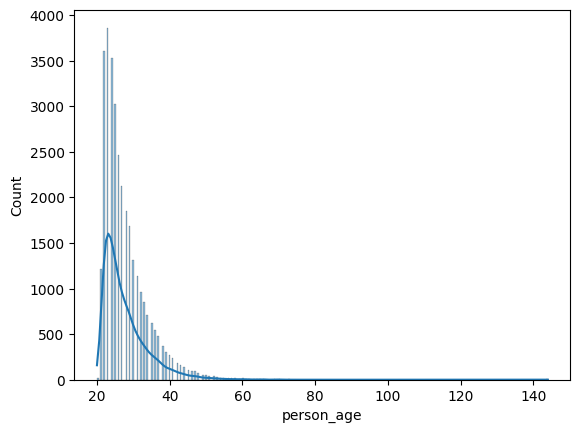

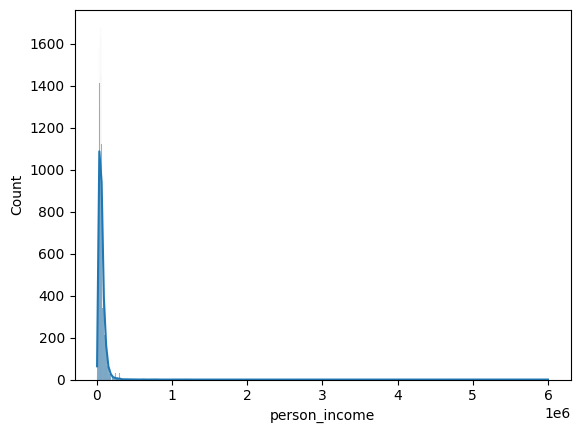

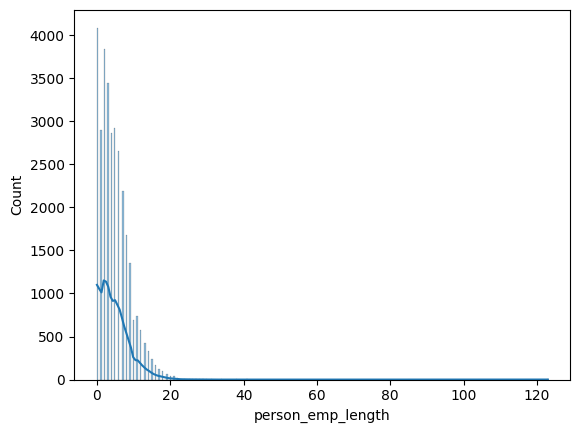

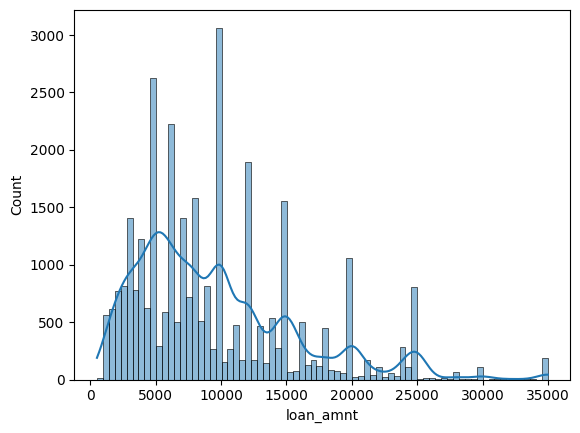

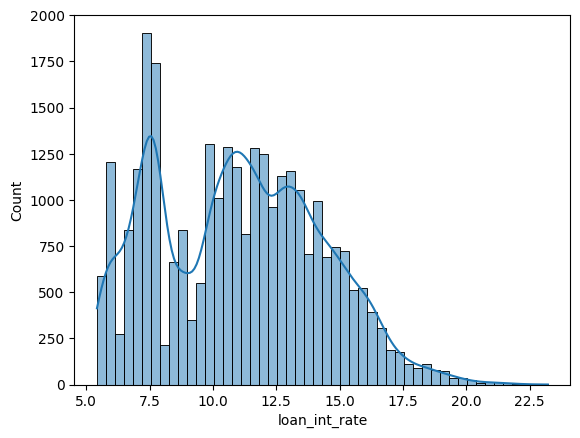

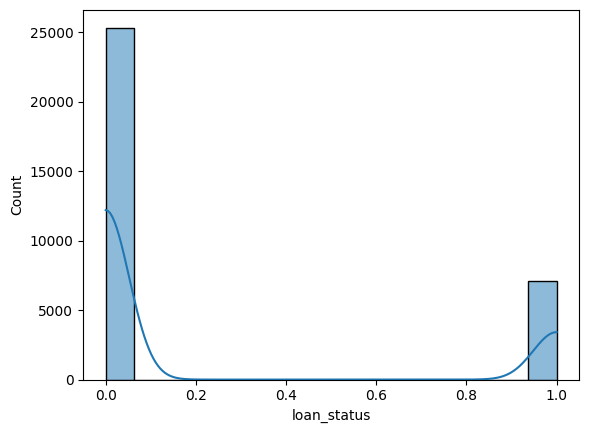

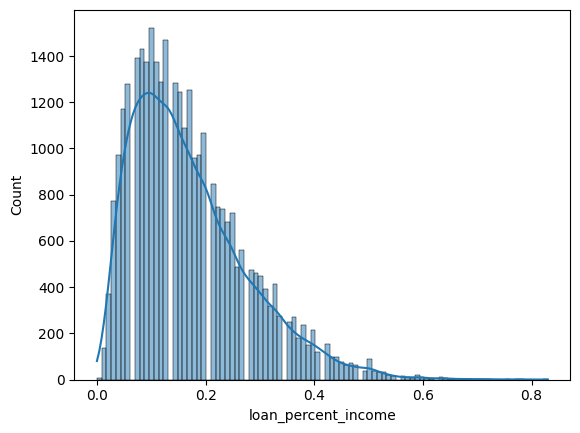

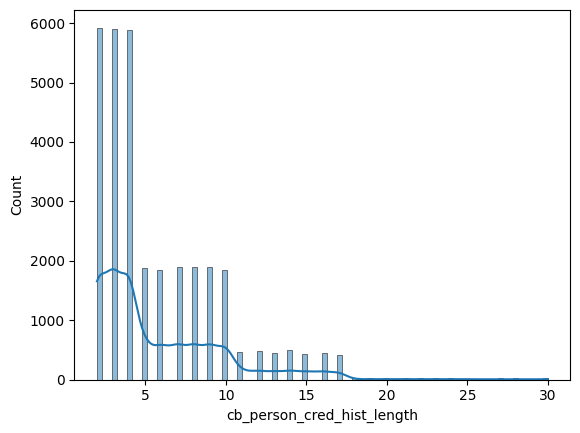

In [120]:
for cols in numeric_cols:
  sns.histplot(df[cols],kde=True)
  plt.show()

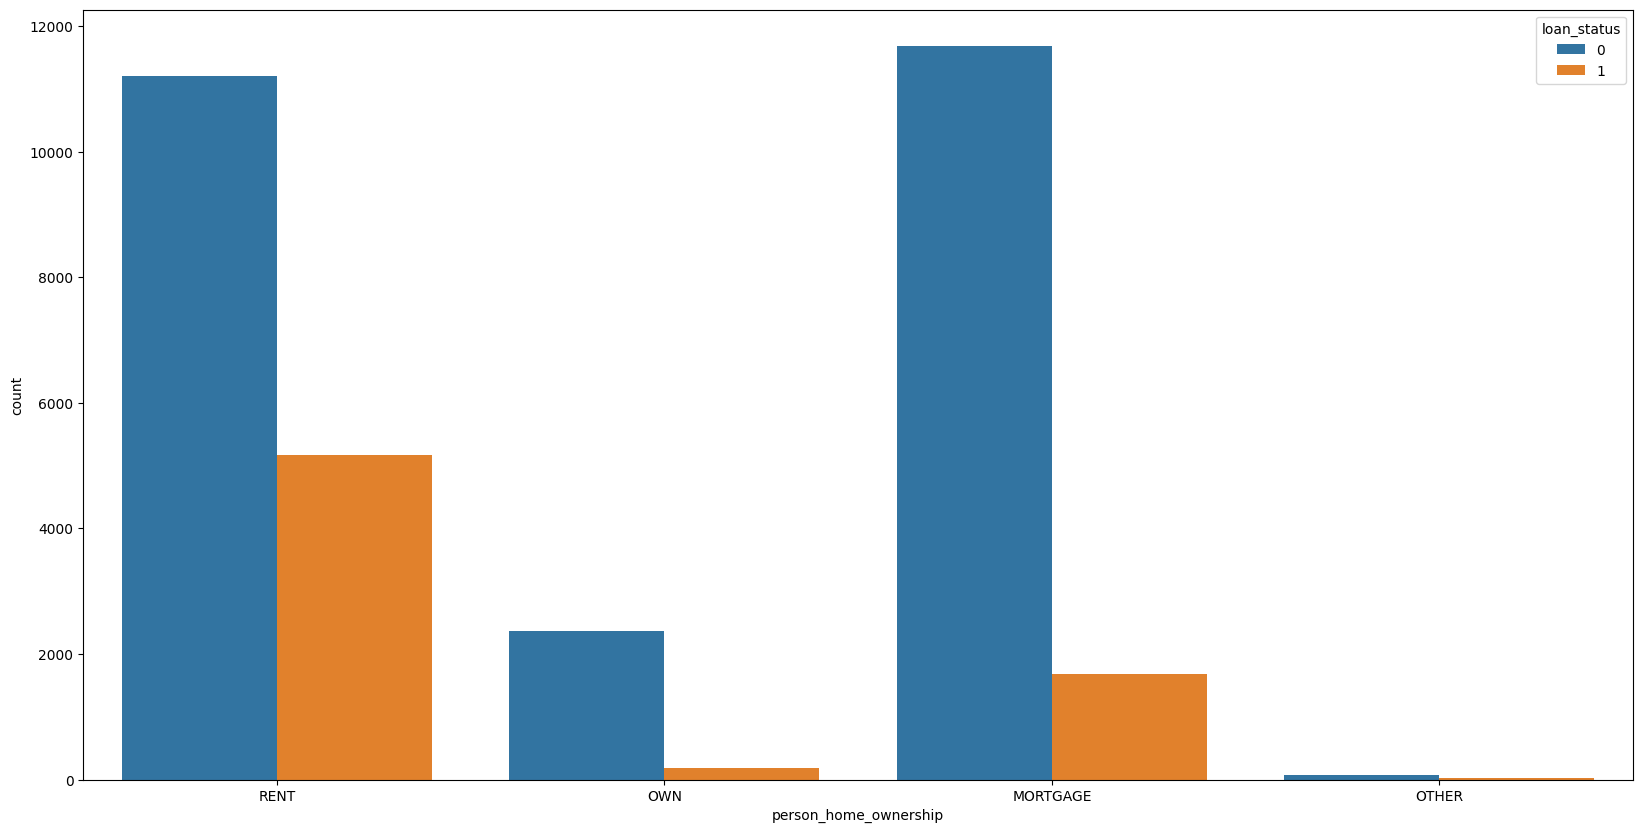

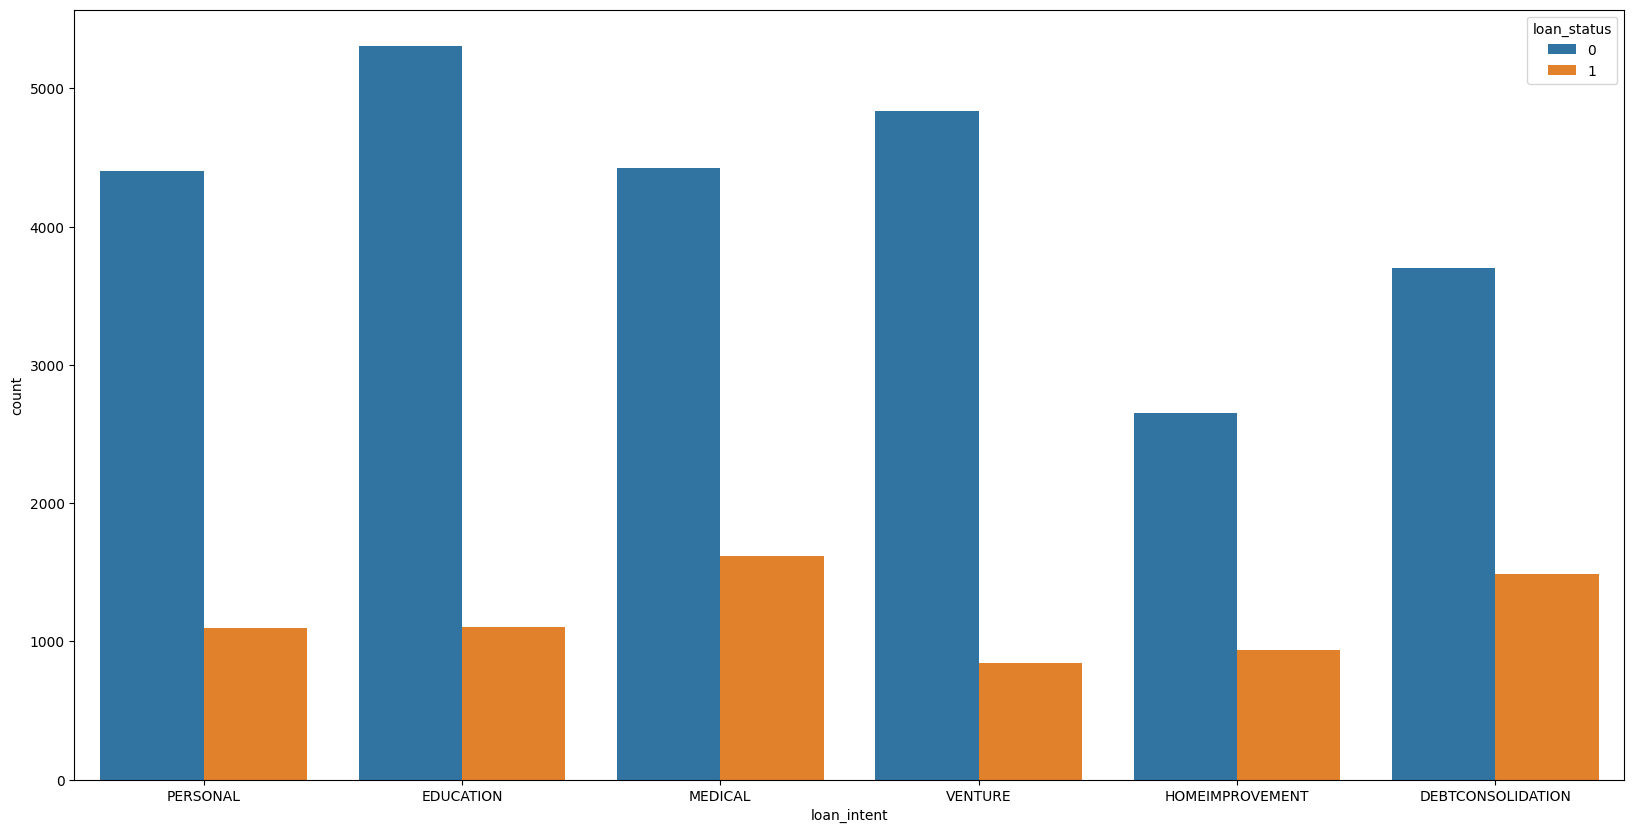

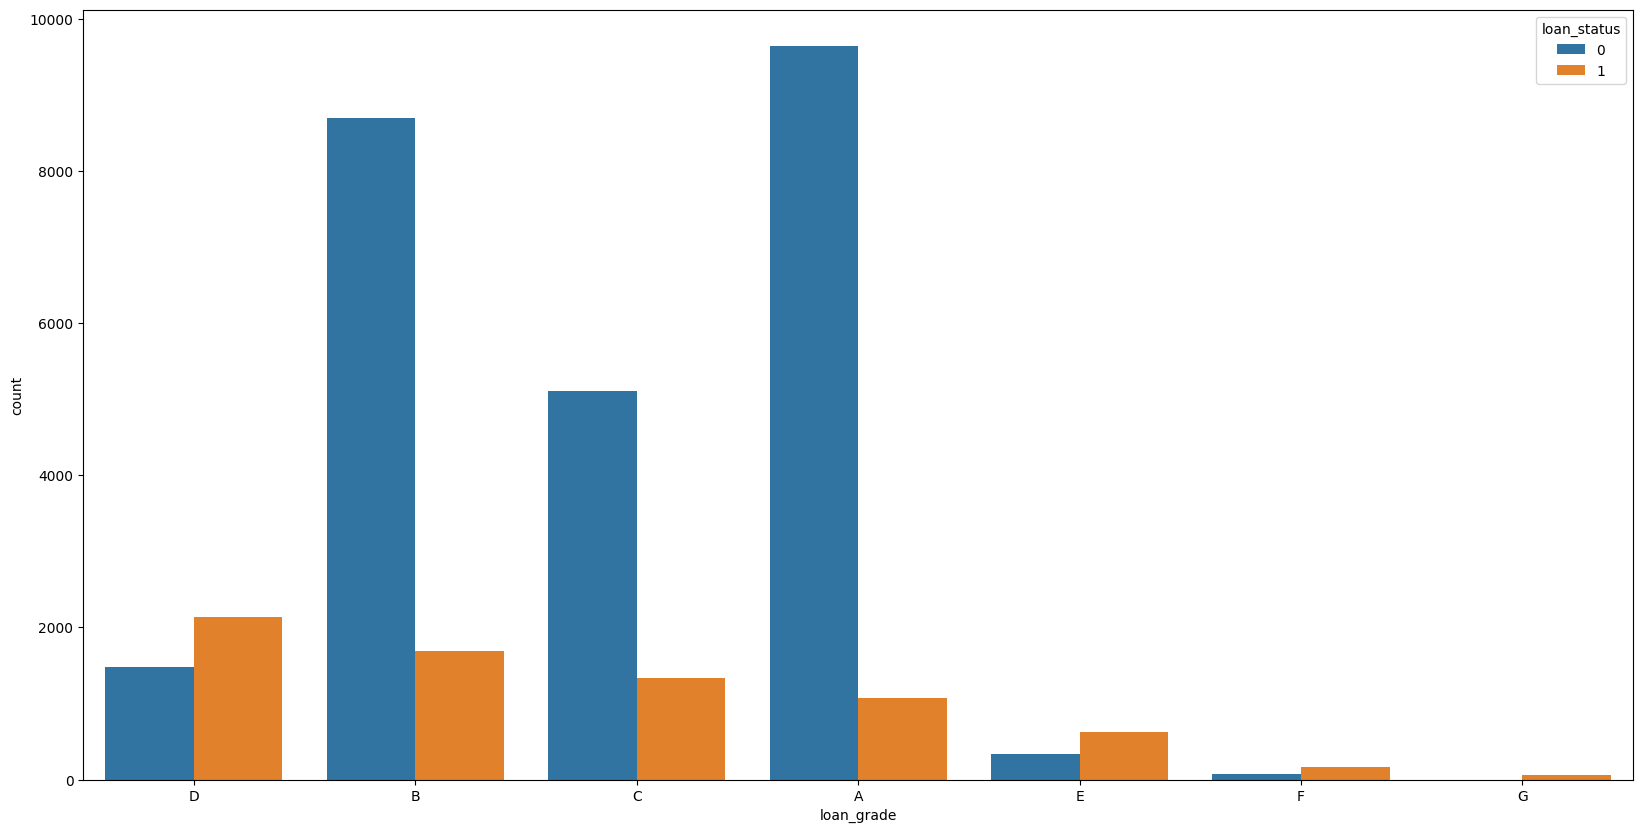

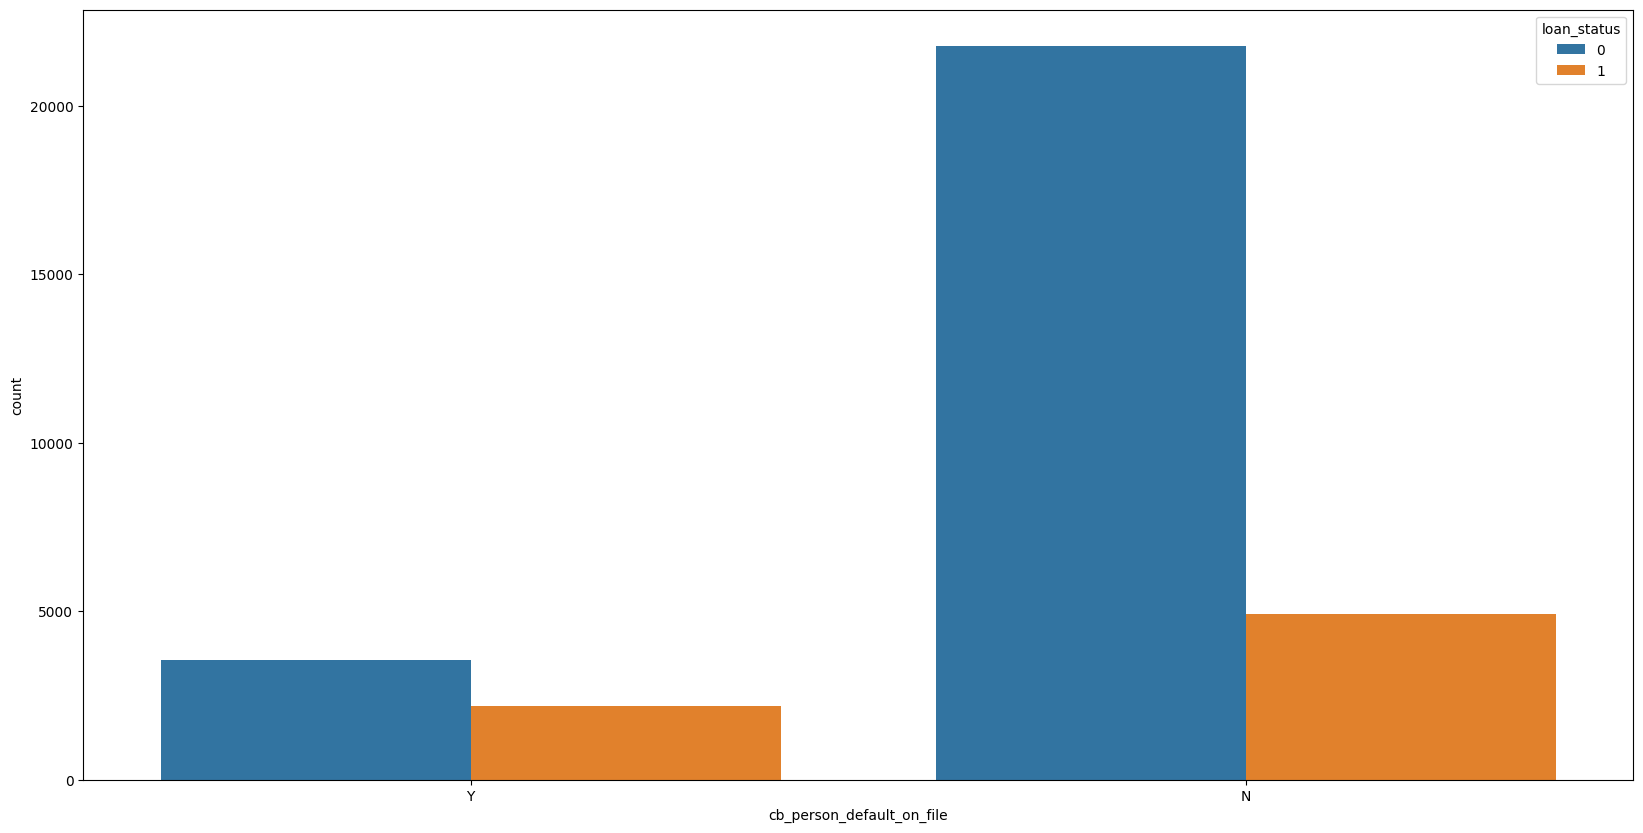

In [121]:
for cols in categorical_cols:
  plt.figure(figsize=(20,10))
  sns.countplot(x = df[cols],hue = df['loan_status'])
  plt.show()

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

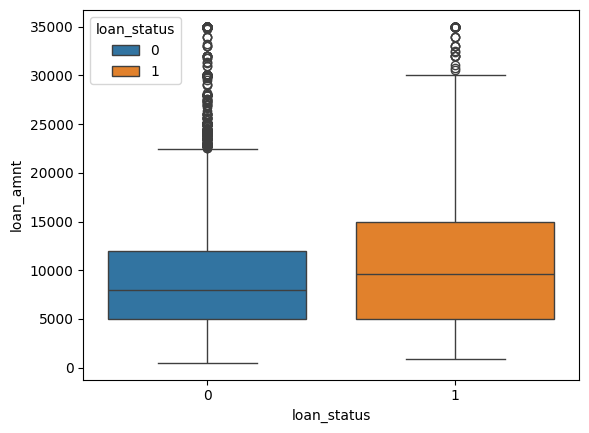

In [122]:
sns.boxplot(x = df['loan_status'],y = df['loan_amnt'],data=df,hue=df['loan_status'])

<Axes: xlabel='loan_status', ylabel='loan_int_rate'>

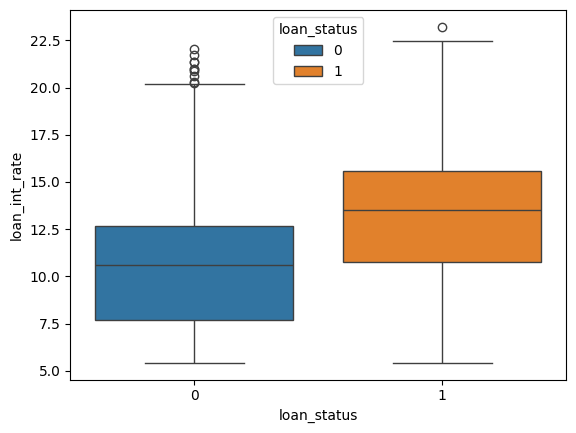

In [123]:
sns.boxplot(x = df['loan_status'],y = df['loan_int_rate'],data=df,hue=df['loan_status'])

<Axes: xlabel='loan_status', ylabel='loan_percent_income'>

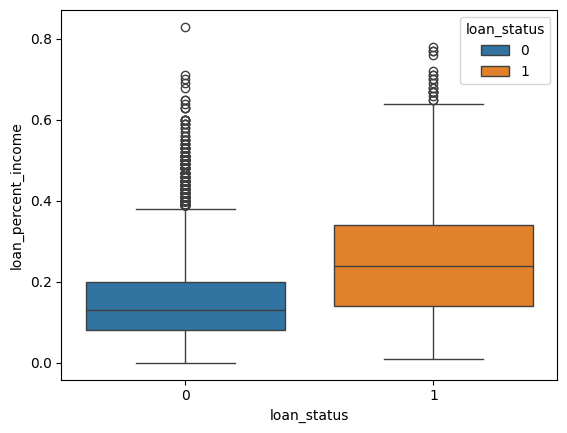

In [124]:
sns.boxplot(x = df['loan_status'],y = df['loan_percent_income'],data=df,hue=df['loan_status'])

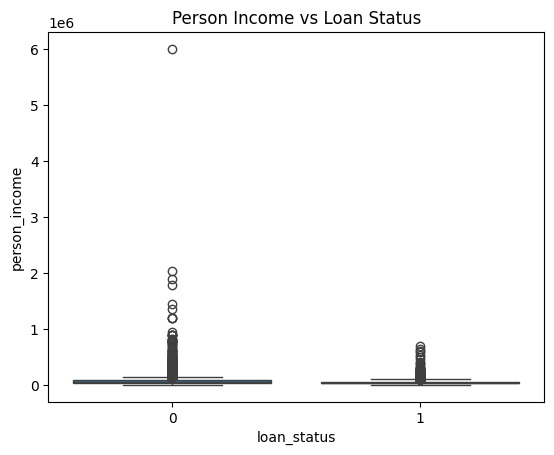

In [125]:
sns.boxplot(x='loan_status', y='person_income', data=df)
plt.title('Person Income vs Loan Status')
plt.show()

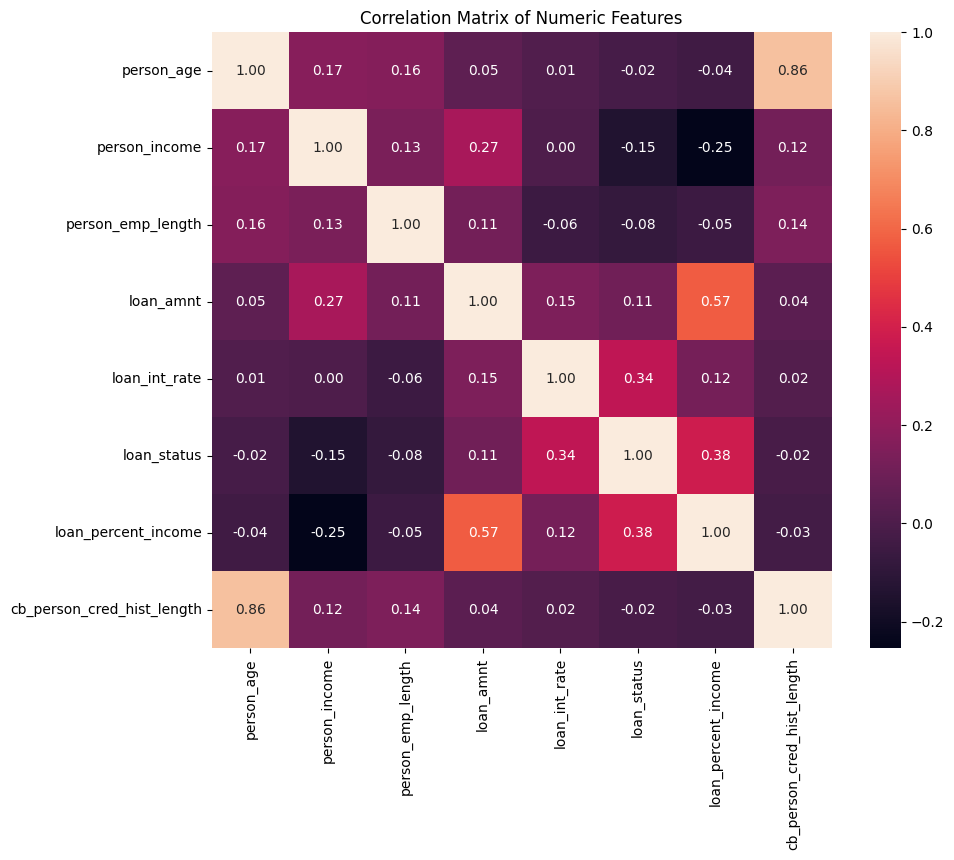

In [126]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [127]:
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

In [128]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [129]:
df.duplicated().sum()

np.int64(0)

In [130]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [131]:
# Encoding
from sklearn.preprocessing import LabelEncoder
cols_to_encode = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
le = LabelEncoder()

for col in cols_to_encode:
  df[col] = le.fit_transform(df[col])

In [132]:
df[['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']].nunique()

,0
person_home_ownership,4
loan_intent,6
loan_grade,7
cb_person_default_on_file,2


In [133]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


In [134]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Exclude 'loan_status' from the columns to be scaled
numeric_cols_to_scale = [col for col in numeric_cols if col != 'loan_status']
df[numeric_cols_to_scale] = scaler.fit_transform(df[numeric_cols_to_scale])

In [135]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,-0.904471,-0.114354,3,28.904903,4,3,4.018287,1.623527,1,3.929865,1,-0.692614
1,-1.061852,-0.910941,2,0.056504,1,1,-1.359219,0.040655,0,-0.657707,0,-0.938982
2,-0.432327,-0.910941,0,-0.921408,3,2,-0.647491,0.601796,1,3.742617,0,-0.692614
3,-0.747089,-0.009540,3,-0.187974,3,2,4.018287,1.367283,1,3.368121,0,-0.938982
4,-0.589708,-0.188530,3,0.789938,3,2,4.018287,1.055898,1,3.555369,1,-0.446246
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,4.603869,-0.211106,0,-0.921408,4,2,-0.600042,0.695860,0,-0.564083,0,5.959324
32577,4.131726,0.869285,0,-0.187974,4,0,1.270223,-1.143256,0,-0.189587,0,3.249275
32578,5.862918,0.159775,3,-0.432452,2,1,4.018287,-0.007999,1,2.712754,0,5.466588
32579,4.446488,1.353041,0,0.056504,4,1,0.855048,0.150937,0,-0.657707,0,4.973852


In [136]:
df_cleaned = df.copy()

In [137]:
df_cleaned

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,-0.904471,-0.114354,3,28.904903,4,3,4.018287,1.623527,1,3.929865,1,-0.692614
1,-1.061852,-0.910941,2,0.056504,1,1,-1.359219,0.040655,0,-0.657707,0,-0.938982
2,-0.432327,-0.910941,0,-0.921408,3,2,-0.647491,0.601796,1,3.742617,0,-0.692614
3,-0.747089,-0.009540,3,-0.187974,3,2,4.018287,1.367283,1,3.368121,0,-0.938982
4,-0.589708,-0.188530,3,0.789938,3,2,4.018287,1.055898,1,3.555369,1,-0.446246
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,4.603869,-0.211106,0,-0.921408,4,2,-0.600042,0.695860,0,-0.564083,0,5.959324
32577,4.131726,0.869285,0,-0.187974,4,0,1.270223,-1.143256,0,-0.189587,0,3.249275
32578,5.862918,0.159775,3,-0.432452,2,1,4.018287,-0.007999,1,2.712754,0,5.466588
32579,4.446488,1.353041,0,0.056504,4,1,0.855048,0.150937,0,-0.657707,0,4.973852


In [138]:
df_cleaned.to_csv('cleaned_data_credit_risk.csv', index=False)

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score,recall_score,precision_score

In [140]:
x = df_cleaned.drop('loan_status', axis=1)
y = df_cleaned['loan_status']

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [143]:
print(df_cleaned['loan_status'].dtype)
print(df_cleaned['loan_status'].unique())

int64
[1 0]


##Logistic Regression

In [146]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy: ", accuracy_lr)
print("f1: ", f1_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy:  0.8419185687847008
f1:  0.5482591449977964
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5073
           1       0.72      0.44      0.55      1411

    accuracy                           0.84      6484
   macro avg       0.79      0.70      0.73      6484
weighted avg       0.83      0.84      0.83      6484



##K-Nearest Neighbor Classifier

In [147]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Accuracy: ", accuracy_knn)
print("f1: ", f1_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Accuracy:  0.8888032078963602
f1:  0.701696317749276
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      5073
           1       0.84      0.60      0.70      1411

    accuracy                           0.89      6484
   macro avg       0.87      0.78      0.82      6484
weighted avg       0.89      0.89      0.88      6484



##Naive-Bayes

In [148]:
NB = GaussianNB()
NB.fit(x_train, y_train)
y_pred_NB = NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred_NB)
print("Naive Bayes Accuracy: ", accuracy_NB)
print("f1: ", f1_score(y_test, y_pred_NB))
print(classification_report(y_test, y_pred_NB))

Naive Bayes Accuracy:  0.8028994447871685
f1:  0.5927342256214149
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      5073
           1       0.54      0.66      0.59      1411

    accuracy                           0.80      6484
   macro avg       0.72      0.75      0.73      6484
weighted avg       0.82      0.80      0.81      6484



##Support Vector Machine (SVM)

In [149]:
svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine Accuracy: ", accuracy_svm)
print("f1: ", f1_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Accuracy:  0.8900370141887723
f1:  0.697496817988969
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      5073
           1       0.87      0.58      0.70      1411

    accuracy                           0.89      6484
   macro avg       0.88      0.78      0.82      6484
weighted avg       0.89      0.89      0.88      6484



##Decision-Tree Classifier

In [150]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred_DT = DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred_DT)
print("Decision Tree Accuracy: ", accuracy_DT)
print("f1: ", f1_score(y_test, y_pred_DT))
print(classification_report(y_test, y_pred_DT))

Decision Tree Accuracy:  0.8857186921653301
f1:  0.743864500518493
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      5073
           1       0.73      0.76      0.74      1411

    accuracy                           0.89      6484
   macro avg       0.83      0.84      0.84      6484
weighted avg       0.89      0.89      0.89      6484



##Random Forest Classifier

In [151]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy: ", accuracy_rf)
print("f1: ", f1_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy:  0.9296730413325108
f1:  0.8129614438063987
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5073
           1       0.96      0.70      0.81      1411

    accuracy                           0.93      6484
   macro avg       0.94      0.85      0.88      6484
weighted avg       0.93      0.93      0.93      6484



##Gradient Boosting Classifier

In [152]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred_gbc = gbc.predict(x_test)
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print("Gradient Boosting Accuracy: ", accuracy_gbc)
print("f1: ", f1_score(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

Gradient Boosting Accuracy:  0.9265885256014805
f1:  0.8049180327868852
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5073
           1       0.95      0.70      0.80      1411

    accuracy                           0.93      6484
   macro avg       0.94      0.84      0.88      6484
weighted avg       0.93      0.93      0.92      6484



##XG Boost

In [153]:
xgb = xgb.XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy: ", accuracy_xgb)
print("f1: ", f1_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy:  0.9366132017273288
f1:  0.8361897170187326
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5073
           1       0.96      0.74      0.84      1411

    accuracy                           0.94      6484
   macro avg       0.94      0.87      0.90      6484
weighted avg       0.94      0.94      0.93      6484

